In [19]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt



In [3]:
nasdaq100_df = pd.read_csv('../nasdaq100.csv')
nasdaq100_list = nasdaq100_df['Symbol'].tolist()
print(nasdaq100_list)

['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'ALXN', 'AMAT', 'AMD', 'AMGN', 'AMZN', 'ANSS', 'ASML', 'ATVI', 'AVGO', 'BIDU', 'BIIB', 'BKNG', 'CDNS', 'CDW', 'CERN', 'CHKP', 'CHTR', 'CMCSA', 'COST', 'CPRT', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'DLTR', 'DOCU', 'DXCM', 'EA', 'EBAY', 'EXC', 'FAST', 'FB', 'FISV', 'FOX', 'FOXA', 'GILD', 'GOOG', 'GOOGL', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KDP', 'KHC', 'KLAC', 'LRCX', 'LULU', 'MAR', 'MCHP', 'MDLZ', 'MELI', 'MNST', 'MRNA', 'MRVL', 'MSFT', 'MTCH', 'MU', 'MXIM', 'NFLX', 'NTES', 'NVDA', 'NXPI', 'OKTA', 'ORLY', 'PAYX', 'PCAR', 'PDD', 'PEP', 'PTON', 'PYPL', 'QCOM', 'REGN', 'ROST', 'SBUX', 'SGEN', 'SIRI', 'SNPS', 'SPLK', 'SWKS', 'TCOM', 'TEAM', 'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRSN', 'VRTX', 'WBA', 'WDAY', 'XEL', 'XLNX', 'ZM', 'HPQ', 'HPE']


In [4]:
stocks_df = pd.DataFrame()
for nasdaq in nasdaq100_list:
    # this api returns pandas DataFrame
    history = yf.Ticker(nasdaq).history(start='2021-03-01', end='2021-05-11')
    stocks_df[nasdaq] = history['Close']



In [5]:
corr_df = stocks_df.corr()


In [6]:
corr_df = corr_df.reindex(corr_df.HPQ.abs().sort_values(ascending=False).index)
target_df = corr_df[corr_df['HPQ']>0.85]['HPQ'].reset_index()
target_df

,index,HPQ
0,HPQ,1.000000
1,CSX,0.958070
2,CPRT,0.944313
3,ORLY,0.944067
4,CERN,0.941222
5,COST,0.940633
6,VRSN,0.937313
7,GOOG,0.932399
8,GOOGL,0.932013
9,XEL,0.924269


In [7]:
pd.merge(left=nasdaq100_df, right=target_df,
        left_on='Symbol', right_on='index',
         how='inner')\
    .sort_values(by='HPQ', ascending=False)


,Symbol,Name,index,HPQ
26,HPQ,"""HP Inc.""",HPQ,1.000000
8,CSX,CSX Corporation Common Stock,CSX,0.958070
7,CPRT,"Copart, Inc. (DE) Common Stock",CPRT,0.944313
19,ORLY,"O'Reilly Automotive, Inc. Common Stock",ORLY,0.944067
5,CERN,Cerner Corporation Common Stock,CERN,0.941222
6,COST,Costco Wholesale Corporation Common Stock,COST,0.940633
24,VRSN,"VeriSign, Inc. Common Stock",VRSN,0.937313
11,GOOG,Alphabet Inc. Class C Capital Stock,GOOG,0.932399
12,GOOGL,Alphabet Inc. Class A Common Stock,GOOGL,0.932013
25,XEL,Xcel Energy Inc. Common Stock,XEL,0.924269


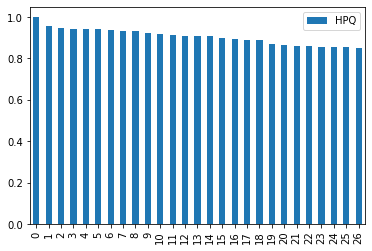

In [21]:
target_df.plot.bar(y='HPQ')
plt.show()